In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
import seaborn as sns

In [107]:
data = pd.read_csv('clustering_data_2000.csv')
data.head()

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
3,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412


In [108]:
data.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [109]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
print(data[data["renewable"].isnull()][null_columns])

    renewable  oil  gas  nuclear  hydroelec  coal  co2_emission  \
49        NaN  NaN  NaN      NaN        NaN   NaN           NaN   

    renewable_percent  oil_percent  gas_percent  nuclear_percent  \
49                NaN          NaN          NaN              NaN   

    hydroelec_percent  coal_percent  co2_percent  
49                NaN           NaN          NaN  


In [110]:
data.loc[[49]]

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
49,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
data = data.drop([2, 49])

In [112]:
selected_data = data.iloc[:, [0, 8, 9, 10, 11, 12, 13, 14]]
selected_data

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,Brazil,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
5,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262
...,...,...,...,...,...,...,...,...
77,South Korea,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [113]:
selected_data.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.829665,0.917393,0.856211,0.844815,1.104162,0.944740,0.918589
std,1.842457,1.361236,1.149905,2.571857,2.544715,3.692398,1.936638
min,0.000000,0.023973,0.000000,0.000000,0.000000,0.000000,0.012844
25%,0.000000,0.193956,0.094475,0.000000,0.031706,0.006162,0.149034
50%,0.091215,0.366283,0.374871,0.000000,0.261816,0.121713,0.291543
75%,0.610594,0.959477,1.038512,0.390770,0.873418,0.447142,1.021048
max,12.481291,7.728742,5.080561,16.957991,15.259953,31.898156,15.521671


In [114]:
# list(selected_data['country'])

In [115]:
# removed_values = selected_data[(selected_data['renewable_percent'] >= 4) & (selected_data['oil_percent'] >= 4) & (selected_data['gas_percent'] >= 4)&(selected_data['nuclear_percent'] >= 4)&
#               (selected_data['hydroelec_percent'] >= 4)& (selected_data['coal_percent'] >= 4) & (selected_data['co2_percent'])]

In [116]:
# removed_values

In [117]:
# desired_values = selected_data[(selected_data['renewable_percent'] < 4) & (selected_data['oil_percent']<4) & (selected_data['gas_percent'] < 4)&(selected_data['nuclear_percent'] < 4)&
#               (selected_data['hydroelec_percent'] < 4)& (selected_data['coal_percent'] < 4) & (selected_data['co2_percent'])]

In [118]:
#  desired_values.describe()

In [119]:
# list(desired_values['country'])

In [120]:
# removed_countries = selected_data[~selected_data.country.isin(desired_values['country'])]
# removed_countries

In [121]:
# removed_countries.to_csv('allincluded_equal_greaterthan_4percent_2000.csv', index=False)

In [122]:
#  desired_values = desired_values.reset_index()

In [123]:
#  desired_values.isnull().sum()

In [124]:
# desired_values

In [125]:
selected_data.isnull().sum()

country              0
renewable_percent    0
oil_percent          0
gas_percent          0
nuclear_percent      0
hydroelec_percent    0
coal_percent         0
co2_percent          0
dtype: int64

In [215]:
features = selected_data.iloc[:,[2,3,4,5,6]]
features

,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent
0,2.728782,4.472900,2.952957,15.259953,1.381896
1,2.648448,1.800441,0.335801,1.414735,0.295957
2,0.604352,1.619131,0.252310,1.455761,0.029184
3,2.581971,0.486516,0.246959,13.020447,0.587282
4,0.355576,0.351635,0.000000,0.816165,0.145144
...,...,...,...,...,...
75,3.136278,0.993021,4.450808,0.171503,1.939251
76,0.101797,0.000000,0.000000,0.137056,0.000015
77,1.318708,0.339270,1.572711,0.195047,1.242199
78,1.051843,1.062587,0.000000,0.251999,0.356203


In [127]:
# Robust scaler
# robust_scaler = RobustScaler()
# robust_df = robust_scaler.fit_transform(features)

# #MinMaxScaler
# # scaler = preprocessing.MinMaxScaler()
# # minmax_df = scaler.fit_transform(x)



# mms = MinMaxScaler()
# mms.fit(robust_df)
# data_transformed = mms.transform(robust_df)

In [216]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


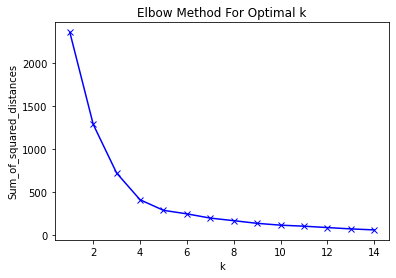

In [217]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [218]:
# Use n_clusters=5 as the k value
kmeans = KMeans(n_clusters=6, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')

In [219]:
# Fit the model to the data
model = kmeans.fit(features)

centroids = model.cluster_centers_
print(centroids)


[[ 0.54106937  0.58855173  0.21503176  0.55513719  0.28767354]
 [ 2.65537607  2.47970775  1.59995821 14.14019992  0.9845889 ]
 [ 6.64635998  1.23807113  0.68365097  9.51330154 31.89815567]
 [ 5.28671126  2.93933024 14.99652496  3.22580096  2.47715064]
 [ 2.45133844  3.48765875  4.50307648  0.48372844  2.29846689]
 [ 3.18070072  1.27150711  0.64408765  3.29316389  7.42657462]]


In [220]:
# Predict the clusters
predicted_clusters = kmeans.predict(features)

In [221]:
predicted_clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 5, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0])

In [222]:
len(predicted_clusters)

80

In [223]:
labels = pd.DataFrame(model.labels_)

labeleddata = pd.concat((selected_data,labels),axis=1, join='inner')

labeleddata = labeleddata.rename({0:'labels'},axis=1)

labeleddata



,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,Canada,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681,1
1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,0
2,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,0
3,Brazil,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412,1
4,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
...,...,...,...,...,...,...,...,...,...
75,South Korea,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094,4
76,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
77,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,0
78,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,0


In [224]:
labels

,0
0,1
1,0
2,0
3,1
4,0
...,...
75,4
76,0
77,0
78,0


In [225]:
label_series = pd.Series(predicted_clusters)
labels_combine = pd.concat([labels, label_series], axis=1 )

In [226]:

labels_combine

,0,0
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
75,4,4
76,0,0
77,0,0
78,0,0


In [227]:
len(labels)

80

In [228]:
len(labeleddata)

80

In [229]:
# labeleddata.to_csv('allincluded__labeled_2000.csv', index=False)

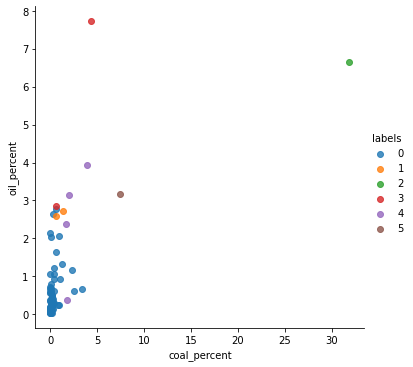

In [230]:
sns.lmplot(x='coal_percent',y='oil_percent',data=labeleddata,hue='labels',fit_reg=False)

In [231]:
labeleddata['Constant'] = "Data"
#This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

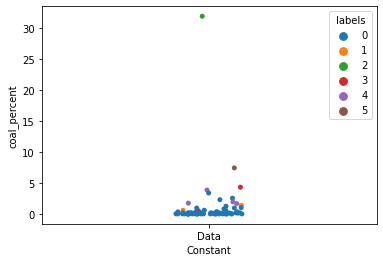

In [232]:
sns.stripplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'],jitter=True)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

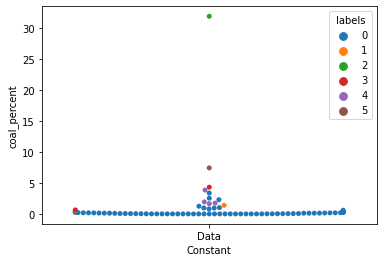

In [233]:
sns.swarmplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'])

In [234]:
# labeleddata.to_csv('diff_labeling_allincluded_2000.csv', index=False)

In [235]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ccinfo_pca = pca.fit_transform(features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

In [236]:
# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,7.264066,5.451094
1,0.008888,0.435508
2,-0.771490,0.021727
3,4.704672,2.132500
4,-1.167572,-0.686660


In [149]:
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, algorithm = 'auto')
# model = kmeans.fit(ccinfo_pca_df)
# labels = kmeans.predict(ccinfo_pca_df)

In [150]:
# ccinfo_pca_df["labels"] = labels

In [151]:
# labels

In [152]:
# conda install hvplot -y

In [153]:
# !conda install -c pyviz hvplot -y

In [154]:
# # Plot the clusters
# import hvplot.pandas
# ccinfo_pca_df.hvplot.scatter(
#     x="PCA1",
#     y="PCA2",
#     by="labels"
# )
# plt.show()

## PCA

In [237]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')
model = kmeans.fit(ccinfo_pca_df)
pca_labels = kmeans.predict(ccinfo_pca_df)

In [238]:
ccinfo_pca_df["pca_labels"] = pca_labels

In [239]:
pca_labels

array([4, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 5, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0])

In [240]:
# Plot the clusters
import hvplot.pandas
ccinfo_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_labels"
)

:NdOverlay   [pca_labels]
   :Scatter   [PCA1]   (PCA2)

## Robust Scaler and then MinMax Scaler doesnt help, so excluding US from data

In [241]:
pca_series = pd.Series(pca_labels)

pca_series.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

allincluded_pca_2000 = pd.concat([data, pca_series], axis=1) 


# pca_2000 = pd.concat([desired_values, pca_series], axis=1, join='inner', ignore_index=True)
# pca_2000.reset_index(drop=True, inplace=True)

allincluded_pca_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,0
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681,4
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,3
2,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,0
3,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412,4
4,Chile,0.013750,0.512528,0.252506,0.000000,0.190810,0.134509,56.353890,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094,3
76,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
77,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,3
78,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,0


In [160]:
# pca_2000.reset_index(drop=True, inplace=True)
# pca_2000

In [242]:

allincluded_pca_2000 = allincluded_pca_2000.rename(columns={0:'labels'})
allincluded_pca_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681,4
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,3
2,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,0
3,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412,4
4,Chile,0.013750,0.512528,0.252506,0.000000,0.190810,0.134509,56.353890,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094,3
76,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
77,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,3
78,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,0


In [243]:
allincluded_pca_2000.isna().sum()

country              0
renewable            0
oil                  0
gas                  0
nuclear              0
hydroelec            0
coal                 0
co2_emission         0
renewable_percent    0
oil_percent          0
gas_percent          0
nuclear_percent      0
hydroelec_percent    0
coal_percent         0
co2_percent          0
labels               0
dtype: int64

In [244]:
allincluded_pca_2000.to_csv('allincluded_pca_2000.csv', index=False)